#  Ford GoBike Analysis

## by Sandy Ibrahim

## Preliminary Wrangling

## Introduction

>This is the last project in Udacity Data Analysis Advanced Track which we study how to use data visualization in data analysis.

## Dataset Overview

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area.it is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

> In this project, we explore data related to bike bike share systems for San Francisco Bay Area in the United States on the month of February 2019. This document explores a dataset containing 183412 rows and 16 columns.

## Gathering Data

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar

#load the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

## Assessing Data

In [2]:
#check the first 5 rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#check the last 5 rows
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [4]:
#check the data rows
df.shape

(183412, 16)

In [5]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

We found that there are 183412 rows in the dataset and we observed that there are some missing values mainly in member birth year and member gender.

In [6]:
#find data statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


According to the data statistics we can find that the minimum duration of a trip is 61 seconds and we can convert it into minutes. Also,we need to check more about the year of birth as the minimum member birth year is 1878 which impossible.

In [7]:
#check the null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#check the member gender unique values
df['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [9]:
#check the user type unique values
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [10]:
#check the bike share for all trip unique values
df['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

## Observations

The following observations were made visually using Excel to view the data & programmaticly using Pandas functions.

## Quality

1- Column 'duration_sec' need to be changed to minutes instead of seconds.                                         
2- Columns ('start_time', 'end_time') are 'object' instead of 'datetime'.                    
3- Extract day of the week from the columns ('start_time', 'end_time').                                        
4- Extact the age of the bike rider from the column ('member_birth_year').                                        
5- Columns ('start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender') have missing values.      
6- Column ('member_gender') has Nan and unvalid values.

## Tidiness

1- Only 12 columns required ('start_station_name', 'end_station_name','user_type', 'member_gender', 'duration_min', 'start_hour', 'end_hour', 'start_date', 'end_date', 'start_day_of_week', 'end_day_of_week', 'rider_age').

## Cleaning Data

In [11]:
#first let's take a copy from our dataframe to work on cleaning it.
df_cleaned = df.copy()

## Define

1- Column 'duration_sec' need to be changed to minutes instead of seconds.

## Code

In [12]:
#change the trip duration from seconds to minutes
df_cleaned['duration_min'] = round(df_cleaned['duration_sec']/60)

## Test

In [13]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,870.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,709.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1031.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.0


## Define

2- Columns ('start_time', 'end_time') are 'object' instead of 'datetime'.

## Code

In [14]:
#extract the value of start hour from start_time
df_cleaned['start_hour']= pd.DatetimeIndex(df_cleaned['start_time']).hour
print(df_cleaned['start_hour'])

0         17
1         18
2         12
3         17
4         23
          ..
183407     0
183408     0
183409     0
183410     0
183411     0
Name: start_hour, Length: 183412, dtype: int64


In [15]:
#extract the value of end hour from end_time
df_cleaned['end_hour']= pd.DatetimeIndex(df_cleaned['end_time']).hour
print(df_cleaned['end_hour'])

0         8
1         6
2         5
3         4
4         0
         ..
183407    0
183408    0
183409    0
183410    0
183411    0
Name: end_hour, Length: 183412, dtype: int64


In [16]:
#normalize start time
df_cleaned['start_date']= pd.DatetimeIndex(df_cleaned['start_time']).normalize()
print(df_cleaned['start_date'])


0        2019-02-28
1        2019-02-28
2        2019-02-28
3        2019-02-28
4        2019-02-28
            ...    
183407   2019-02-01
183408   2019-02-01
183409   2019-02-01
183410   2019-02-01
183411   2019-02-01
Name: start_date, Length: 183412, dtype: datetime64[ns]


In [17]:
#normalize end time
df_cleaned['end_date']= pd.DatetimeIndex(df_cleaned['end_time']).normalize()
print(df_cleaned['end_date'])

0        2019-03-01
1        2019-03-01
2        2019-03-01
3        2019-03-01
4        2019-03-01
            ...    
183407   2019-02-01
183408   2019-02-01
183409   2019-02-01
183410   2019-02-01
183411   2019-02-01
Name: end_date, Length: 183412, dtype: datetime64[ns]


## Test

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  object        
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

## Define

3- Extract day of the week from the columns ('start_time', 'end_time').

## Code

In [19]:
#extract days of the week from the start & end time
df_cleaned['start_day_of_week'] = df_cleaned.start_date.dt.day_name()
df_cleaned['end_day_of_week'] = df_cleaned.end_date.dt.day_name()
print(df_cleaned.start_day_of_week)
print(df_cleaned.end_day_of_week)

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
            ...   
183407      Friday
183408      Friday
183409      Friday
183410      Friday
183411      Friday
Name: start_day_of_week, Length: 183412, dtype: object
0         Friday
1         Friday
2         Friday
3         Friday
4         Friday
           ...  
183407    Friday
183408    Friday
183409    Friday
183410    Friday
183411    Friday
Name: end_day_of_week, Length: 183412, dtype: object


In [20]:
#get the month name value from the month number
df_cleaned['start_month'] = df_cleaned['start_date'].dt.month
df_cleaned['start_month'] = df_cleaned['start_month'].apply(lambda x: calendar.month_abbr[x])
print(df_cleaned['start_month'])

0         Feb
1         Feb
2         Feb
3         Feb
4         Feb
         ... 
183407    Feb
183408    Feb
183409    Feb
183410    Feb
183411    Feb
Name: start_month, Length: 183412, dtype: object


## Test

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  object        
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

## Define

4- Extact the age of the bike rider from the column ('member_birth_year').

## Code

In [22]:
#extact the age of the bike rider from birth year column
now = datetime.now()
df_cleaned['rider_age'] = now.year - df_cleaned['member_birth_year']

## Test

In [23]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,duration_min,start_hour,end_hour,start_date,end_date,start_day_of_week,end_day_of_week,start_month,rider_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,870.0,17,8,2019-02-28,2019-03-01,Thursday,Friday,Feb,37.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,No,709.0,18,6,2019-02-28,2019-03-01,Thursday,Friday,Feb,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,1031.0,12,5,2019-02-28,2019-03-01,Thursday,Friday,Feb,49.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,608.0,17,4,2019-02-28,2019-03-01,Thursday,Friday,Feb,32.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,26.0,23,0,2019-02-28,2019-03-01,Thursday,Friday,Feb,47.0


## Define

5- Columns ('start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender') have missing values.

## Code

In [24]:
#remove missing values from the column 'rider_age'
df_cleaned['rider_age'] = df_cleaned.rider_age.fillna(0.0).astype(int)
df_cleaned['rider_age'].isnull().sum()

0

## Test

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  object        
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

## Define


6- Column ('member_gender') has Nan and unvalid values.

## Code

In [26]:
df_cleaned.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
duration_min                  0
start_hour                    0
end_hour                      0
start_date                    0
end_date                      0
start_day_of_week             0
end_day_of_week               0
start_month                   0
rider_age                     0
dtype: int64

In [27]:
#check for duplicates
df_cleaned.duplicated().sum()

0

In [28]:
#drop null values from the dataset
df_cleaned.dropna(inplace=True)

## Test

In [29]:
df_cleaned.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_min               0
start_hour                 0
end_hour                   0
start_date                 0
end_date                   0
start_day_of_week          0
end_day_of_week            0
start_month                0
rider_age                  0
dtype: int64

In [30]:
df_cleaned.shape

(174952, 25)

In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  object        
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Define

1- Only 12 columns required ('start_station_name', 'end_station_name','user_type', 'member_gender', 'duration_min', 'start_hour', 'end_hour', 'start_date', 'end_date', 'start_day_of_week', 'end_day_of_week', 'rider_age').

## Code

In [32]:
#delete unnecessary columns
delete_columns = ['duration_sec', 'start_time','end_time','start_station_id','start_station_latitude','start_station_longitude',
                  'end_station_id','end_station_latitude','end_station_longitude','bike_id','member_birth_year','bike_share_for_all_trip', 'start_month']
df_cleaned.drop(delete_columns, axis=1, inplace = True)

## Test

In [33]:
df_cleaned.head()

,start_station_name,end_station_name,user_type,member_gender,duration_min,start_hour,end_hour,start_date,end_date,start_day_of_week,end_day_of_week,rider_age
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,870.0,17,8,2019-02-28,2019-03-01,Thursday,Friday,37
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,1031.0,12,5,2019-02-28,2019-03-01,Thursday,Friday,49
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,608.0,17,4,2019-02-28,2019-03-01,Thursday,Friday,32
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,26.0,23,0,2019-02-28,2019-03-01,Thursday,Friday,47
5,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,30.0,23,0,2019-02-28,2019-03-01,Thursday,Friday,62


In [34]:
df_cleaned.shape

(174952, 12)

In [35]:
#convert into ordered categorical types

ordinal_var_dict = {'start_day_of_week': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                    'end_day_of_week': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                   'user_type': ['Customer','Subscriber'],
                   'member_gender' :['Male','Female']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_cleaned[var] = df_cleaned[var].astype(ordered_var)

In [36]:
df_cleaned.head()

,start_station_name,end_station_name,user_type,member_gender,duration_min,start_hour,end_hour,start_date,end_date,start_day_of_week,end_day_of_week,rider_age
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,870.0,17,8,2019-02-28,2019-03-01,Thursday,Friday,37
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,1031.0,12,5,2019-02-28,2019-03-01,Thursday,Friday,49
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,NaN,608.0,17,4,2019-02-28,2019-03-01,Thursday,Friday,32
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,26.0,23,0,2019-02-28,2019-03-01,Thursday,Friday,47
5,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,30.0,23,0,2019-02-28,2019-03-01,Thursday,Friday,62


In [37]:
#grouping time of the day as Early Morning, Morning Peak, Afternoon, Evening Peak, Night
bins = [0,7,9,17,19,23]
labels = ['Early Morning', 'Morning Peak', 'Afternoon',' Evening Peak','Night']
df_cleaned['time_of_day'] = pd.cut(df_cleaned['start_hour'],bins=bins, labels= labels, include_lowest = True)
df_cleaned.head()

,start_station_name,end_station_name,user_type,member_gender,duration_min,start_hour,end_hour,start_date,end_date,start_day_of_week,end_day_of_week,rider_age,time_of_day
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,870.0,17,8,2019-02-28,2019-03-01,Thursday,Friday,37,Afternoon
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,1031.0,12,5,2019-02-28,2019-03-01,Thursday,Friday,49,Afternoon
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,NaN,608.0,17,4,2019-02-28,2019-03-01,Thursday,Friday,32,Afternoon
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,26.0,23,0,2019-02-28,2019-03-01,Thursday,Friday,47,Night
5,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,30.0,23,0,2019-02-28,2019-03-01,Thursday,Friday,62,Night


In [38]:
df_cleaned.describe()

,duration_min,start_hour,end_hour,rider_age
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733224,13.456165,13.609533,36.196865
std,27.372059,4.734282,4.748029,10.118731
min,1.000000,0.000000,0.000000,20.000000
25%,5.000000,9.000000,9.000000,29.000000
50%,8.000000,14.000000,14.000000,34.000000
75%,13.000000,17.000000,18.000000,41.000000
max,1409.000000,23.000000,23.000000,143.000000


## Univariate Exploration

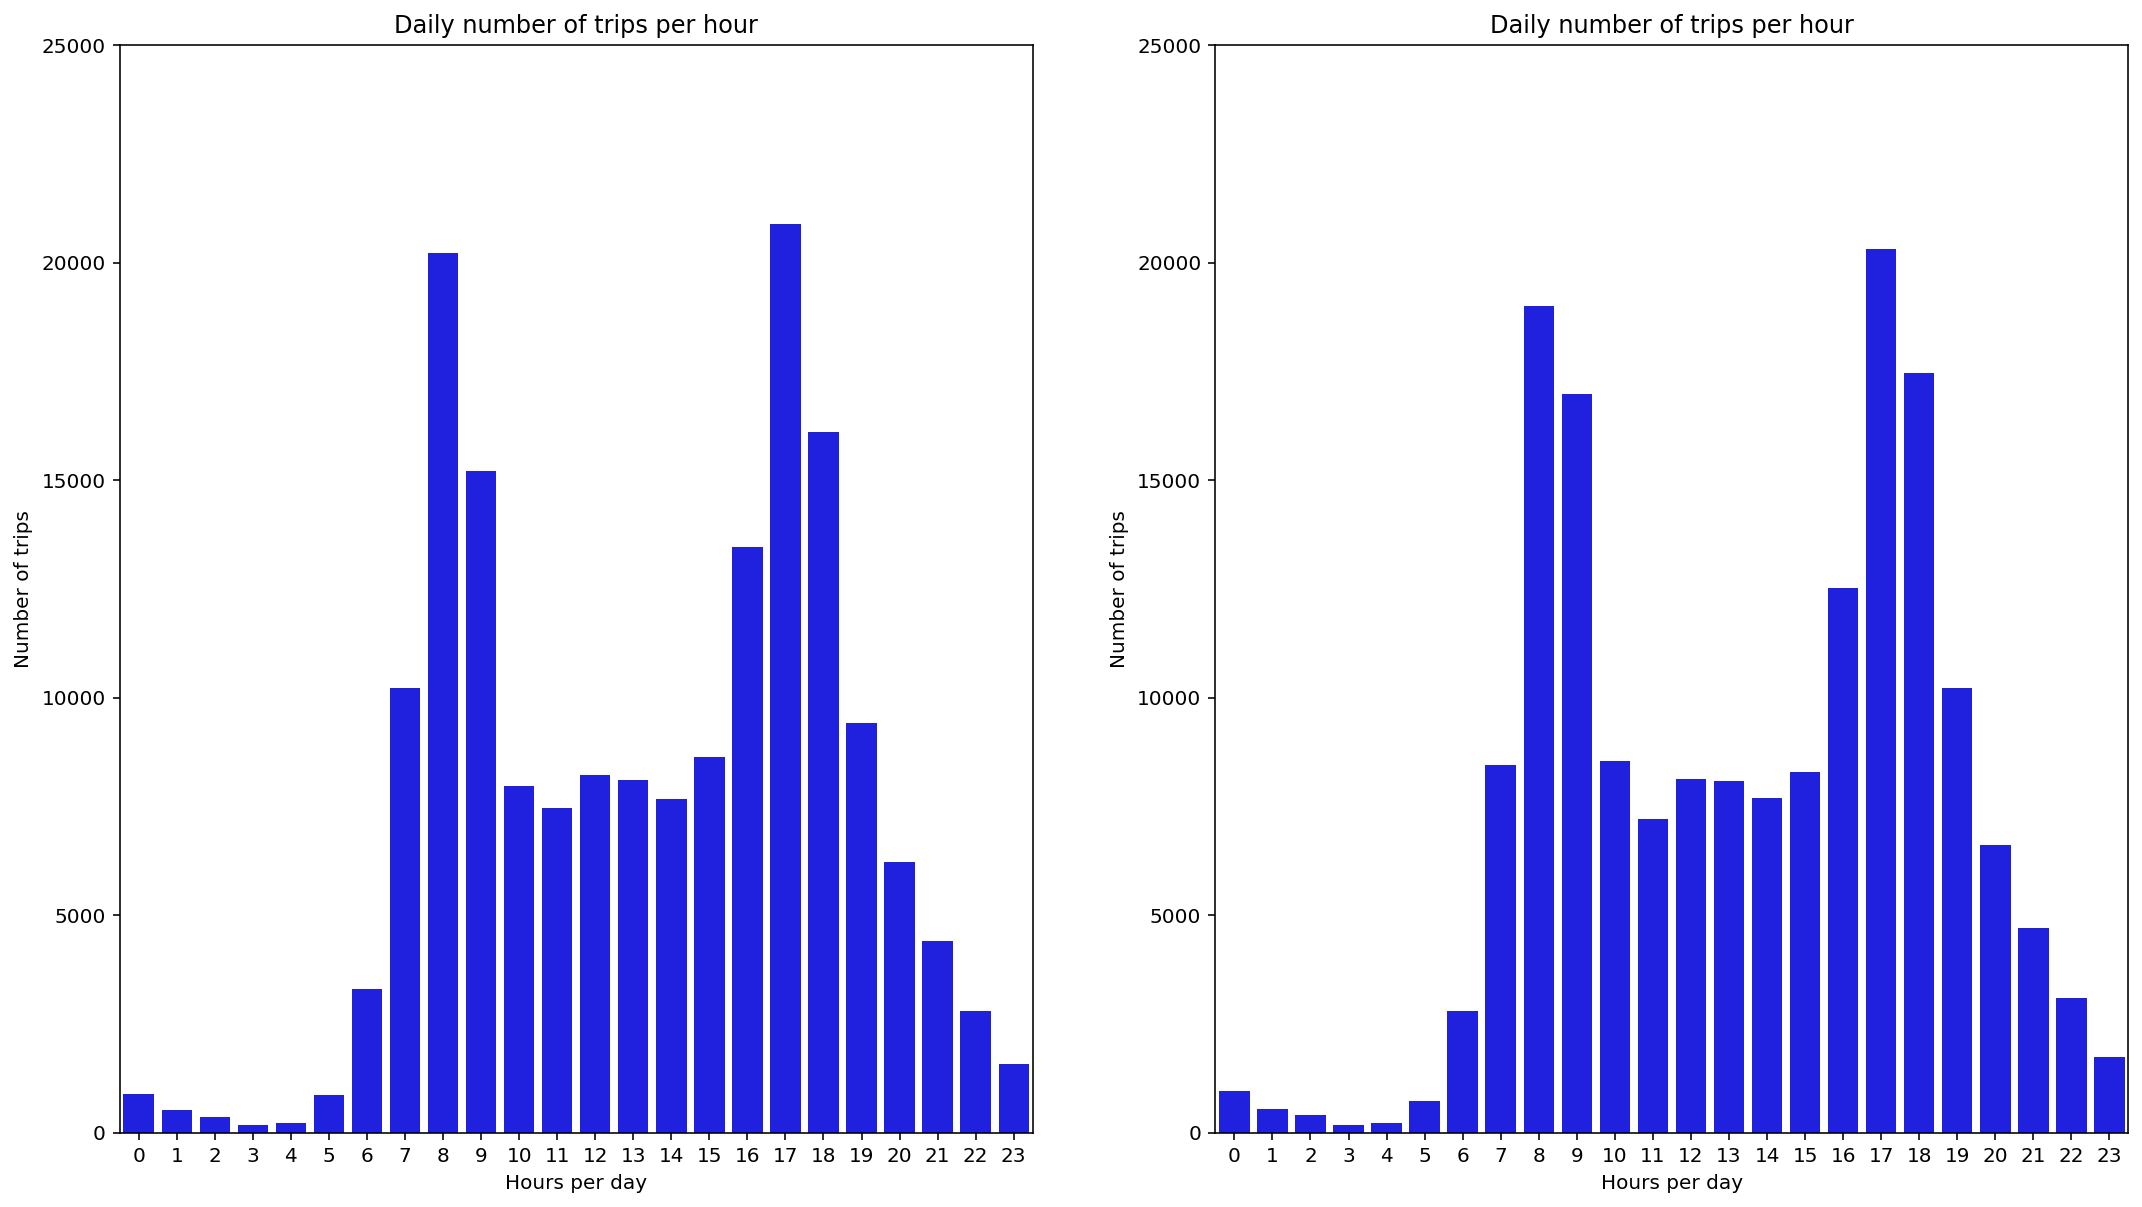

In [55]:
plt.figure(figsize = (18,10))

plt.subplot(1, 2, 1)
fig1 = sns.countplot(data = df_cleaned, x='start_hour', color='Blue')
plt.title('Daily number of trips per hour')
plt.xlabel('Hours per day')
plt.ylabel('Number of trips');
plt.ylim(0, 25000)

plt.subplot(1, 2, 2)
fig1 = sns.countplot(data = df_cleaned, x='end_hour', color='Blue')
plt.title('Daily number of trips per hour')
plt.xlabel('Hours per day')
plt.ylabel('Number of trips');
plt.ylim(0, 25000)
plt.show()

The above figure shows the peak hours of the day is from 7 to 9 AM and from 4 to 7 PM. Also, the lowest number of bikes are rented during 12 AM to 5 AM.

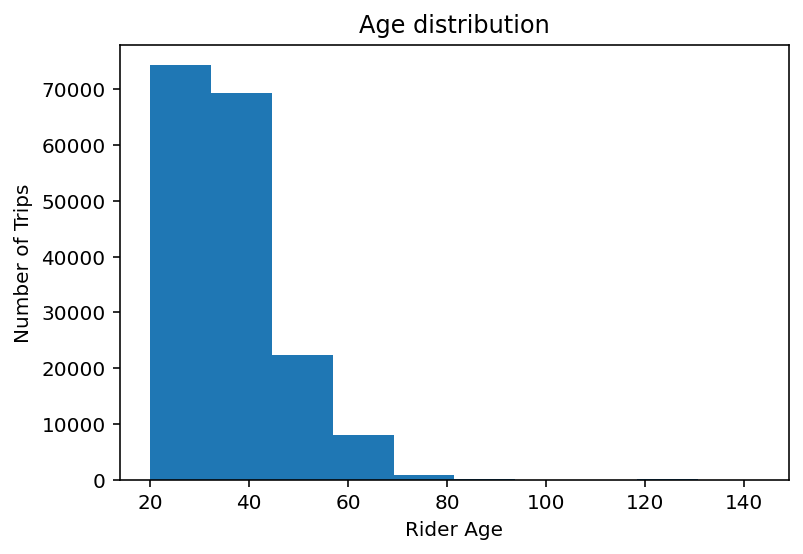

In [39]:
#figure to show the age of the bike rider

plt.hist(data = df_cleaned, x='rider_age')
plt.title('Age distribution')
plt.xlabel('Rider Age')
plt.ylabel('Number of Trips');

According to the above figure, we can see that the highest riders ages are between the age of 20 to 40 years old.

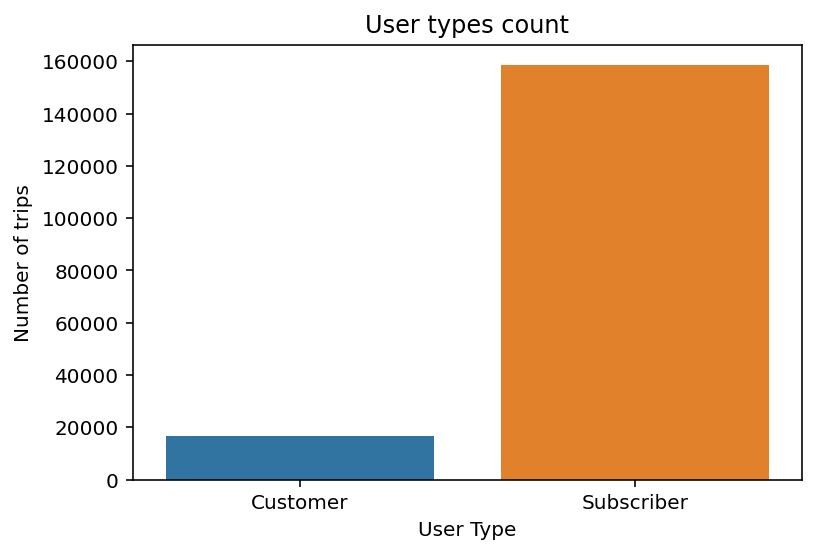

In [40]:
#figure to show the number of user_type
sns.countplot(data=df_cleaned, x='user_type')
plt.xlabel('User Type')
plt.ylabel('Number of trips')
plt.title('User types count');

The above figure shows the comparison between number of customers and subscribers of the data.We can clearly see that the subscribers are more than the customers in our the dataset.

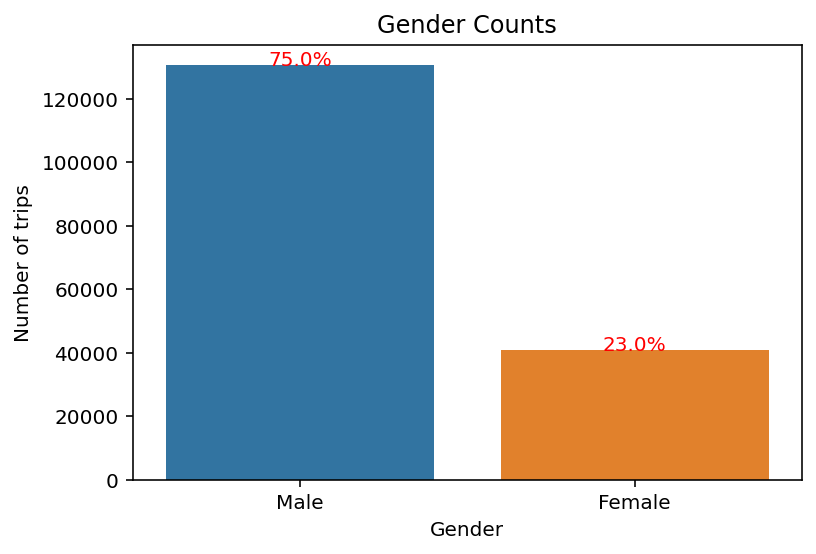

In [41]:
#let's create the plot for member_gender to check the relationship between them

sns.countplot(data=df_cleaned, x='member_gender')
plt.xlabel('Gender');
plt.ylabel('Number of trips');
plt.title('Gender Counts');

# add annotations

n_points = df_cleaned.shape[0]
cat_counts = df_cleaned['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(round(100*count/n_points))

    # print the annotation just below the top of the bar
    plt.text(loc, count, pct_string, ha = 'center', color = 'r')

The above figure shows the comparison between number of bikes rented by Males versus Female. The males are renting bikes more than the females in the our dataset with 75% for Males and 23% for Females.

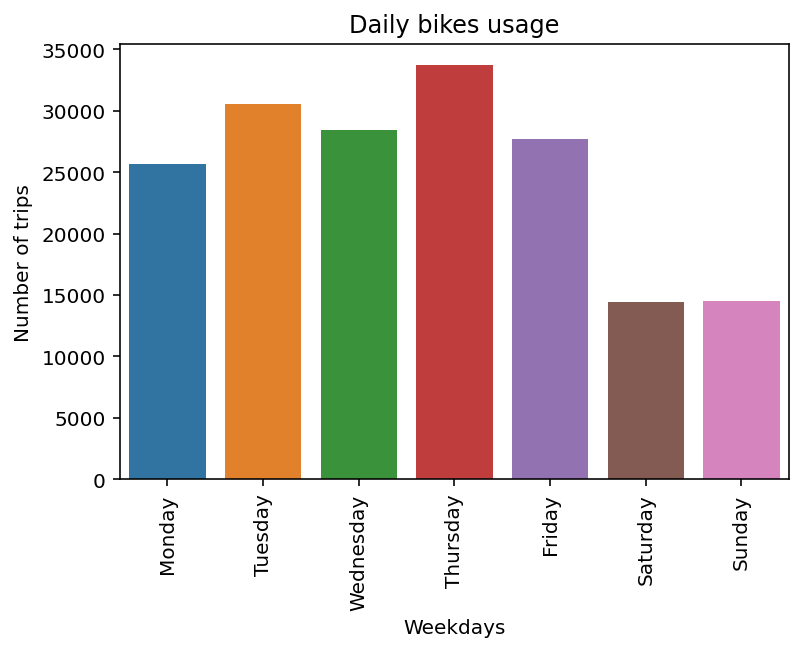

In [42]:
#figure to show the number of bikes rented per weekdays
sns.countplot(data=df_cleaned, x='start_day_of_week')
plt.xticks(rotation = 90)
plt.xlabel('Weekdays');
plt.ylabel('Number of trips');
plt.title('Daily bikes usage');

The above figure shows that the number of bikes rented on the weekdays are higher than the ones on weekends.

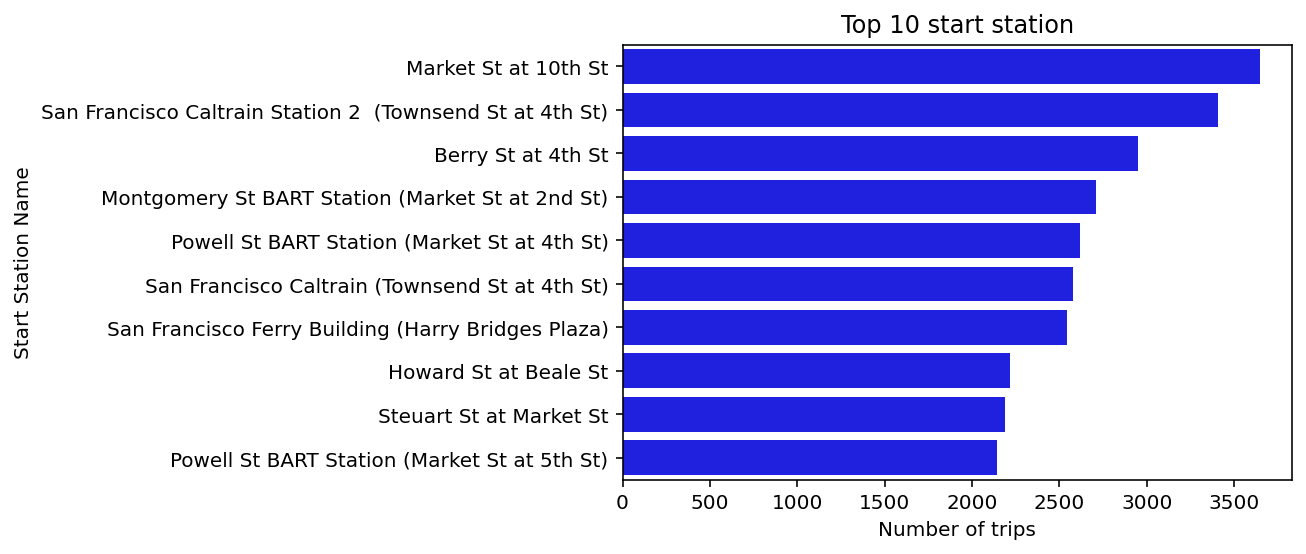

In [43]:
#figure to show the top ten start stations
start_station_name = df_cleaned['start_station_name'].value_counts()[:10].index
sns.countplot(data=df_cleaned,y='start_station_name', color='b',order = start_station_name)
plt.title('Top 10 start station')
plt.xlabel('Number of trips')
plt.ylabel('Start Station Name');

From the figure, we can see that the top station of pickup a bike is "Market St at 10th St".

## Bivariate Exploration


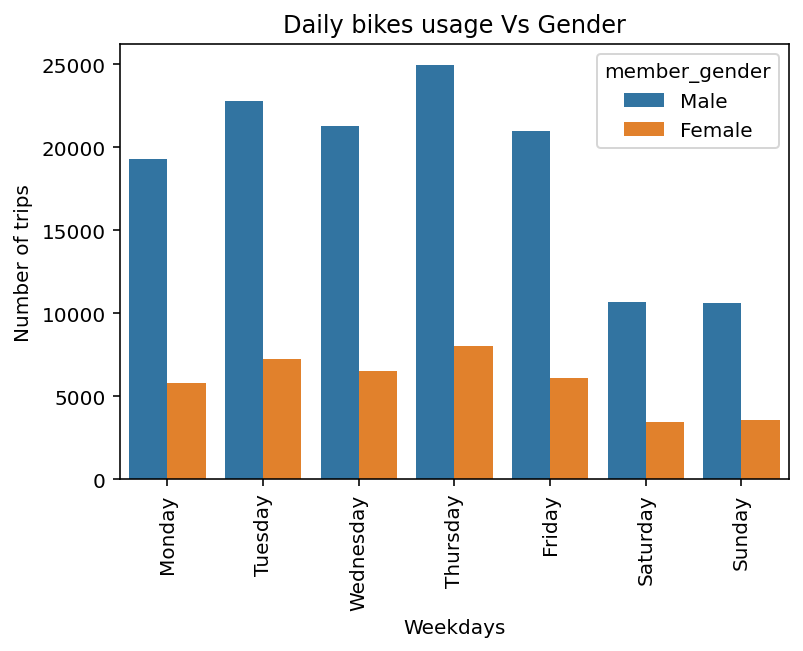

In [44]:
# figure to show the comparison between daily bike usage and gender
sns.countplot(data=df_cleaned, x='start_day_of_week', hue ='member_gender')
plt.xticks(rotation=90)
plt.xlabel('Weekdays');
plt.ylabel('Number of trips');
plt.title('Daily bikes usage Vs Gender');

According to the figure, we can see that the number of males are more than the number of females. Also the number of bikes rented on the weekdays more than the weekends.

Text(0.5, 1.0, 'Trip duration Vs Age')

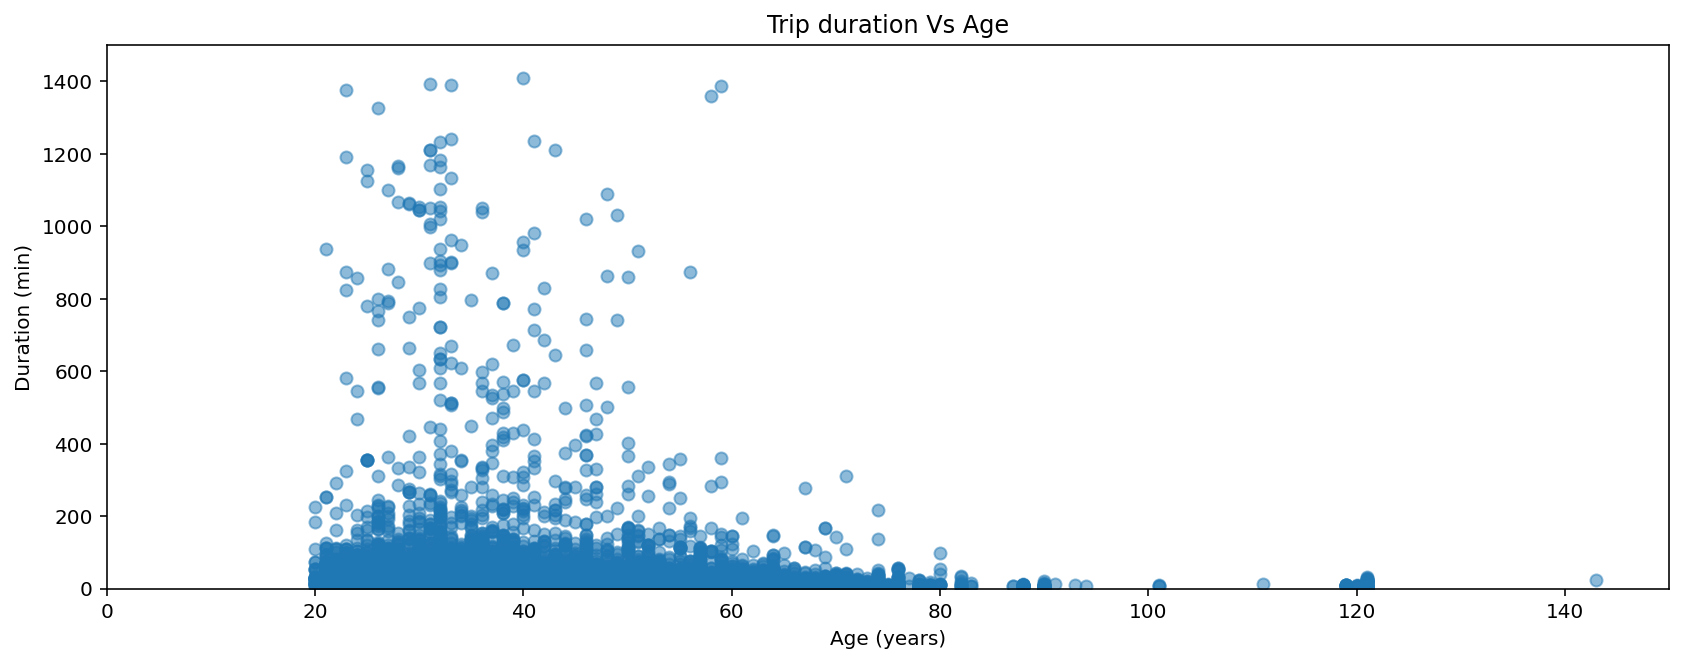

In [45]:
#figure to show the correlation between trip duration & rider_age

plt.figure(figsize=[14,5])
plt.scatter(df_cleaned['rider_age'], df_cleaned['duration_min'], alpha = 0.5, marker = 'o' )
plt.axis([0, 150, 0, 1500])
plt.xlabel('Age (years)')
plt.ylabel('Duration (min)');
plt.title('Trip duration Vs Age')

As we can see, the highest duration of trips around the age of 30 years old. Also, we can find a lot of outliers in age of the rider.

Text(0.5, 1.0, 'Gender usage Vs User type')

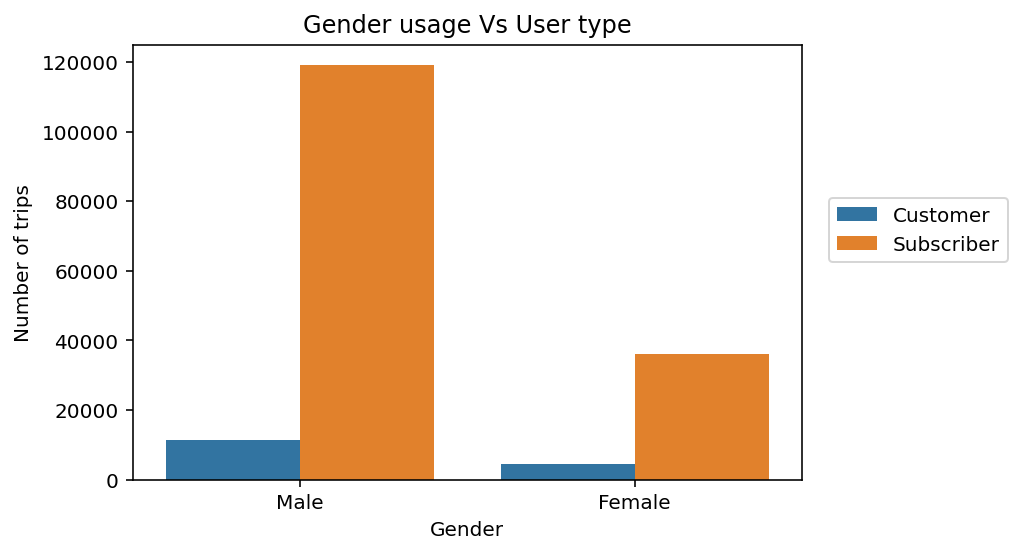

In [46]:
#figure to show the comparison of gender with user type

sns.countplot(data = df_cleaned, x = 'member_gender', hue = 'user_type')
plt.xlabel('Gender')
plt.ylabel('Number of trips')
plt.legend(loc=(1.04,0.5))
plt.title('Gender usage Vs User type')

From the above figure, we can see that the number of subscribed males are more than the subscribed females. Also, the number of customer males are more than the customer
 females.

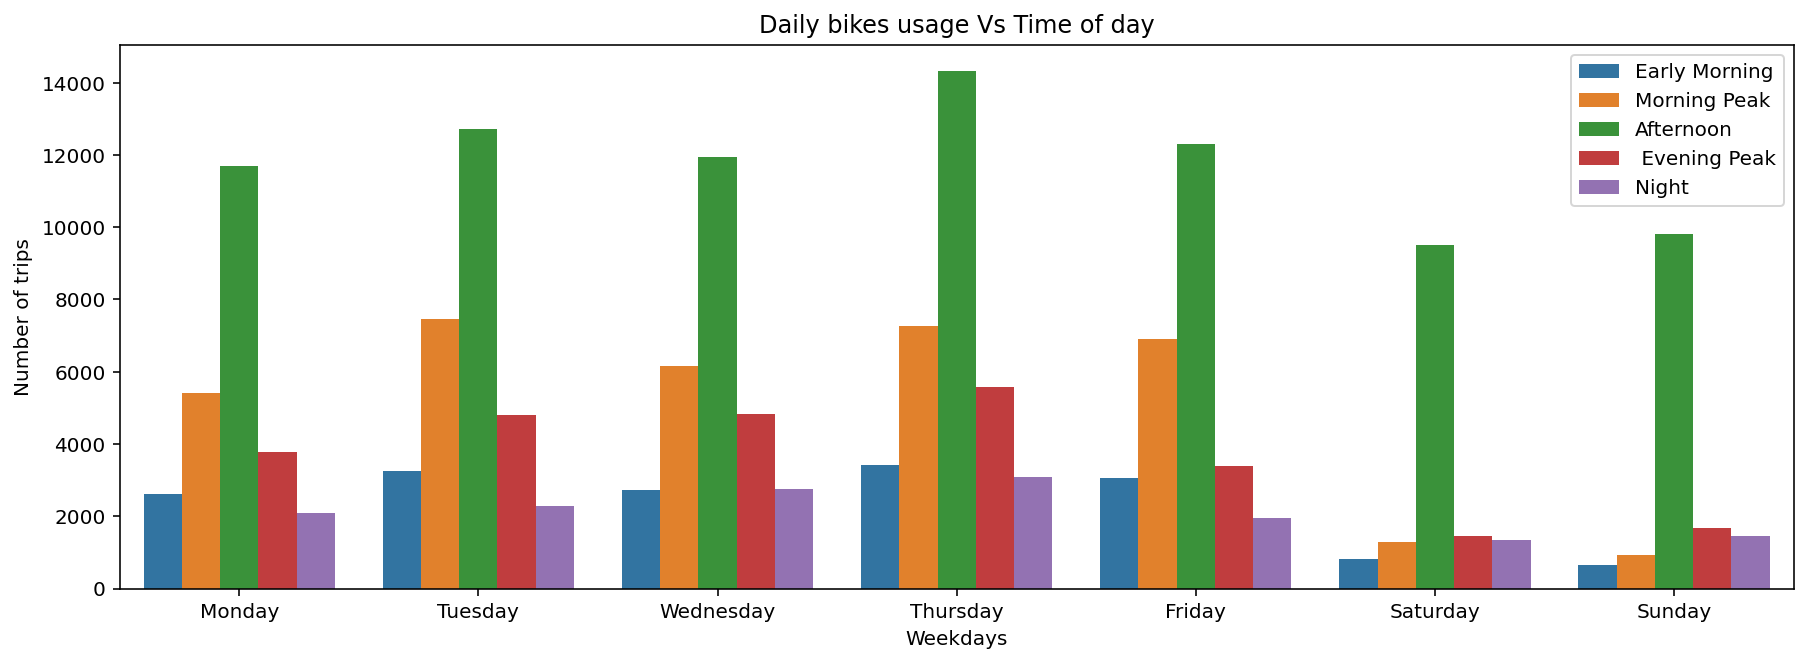

In [55]:
#figure to show the highest and lowest hour for renting in a day
plt.figure(figsize=[15,5])
sns.countplot(data = df_cleaned, x = 'start_day_of_week', hue = 'time_of_day')
plt.xlabel('Weekdays')
plt.ylabel('Number of trips')
plt.title('Daily bikes usage Vs Time of day')
plt.legend()
plt.show()

The above figure clearly shows that weekdays are more busy than weekends. Also, it shows the peak hours of the day.

Text(0.5, 1.0, 'Rider age Vs Weekdays')

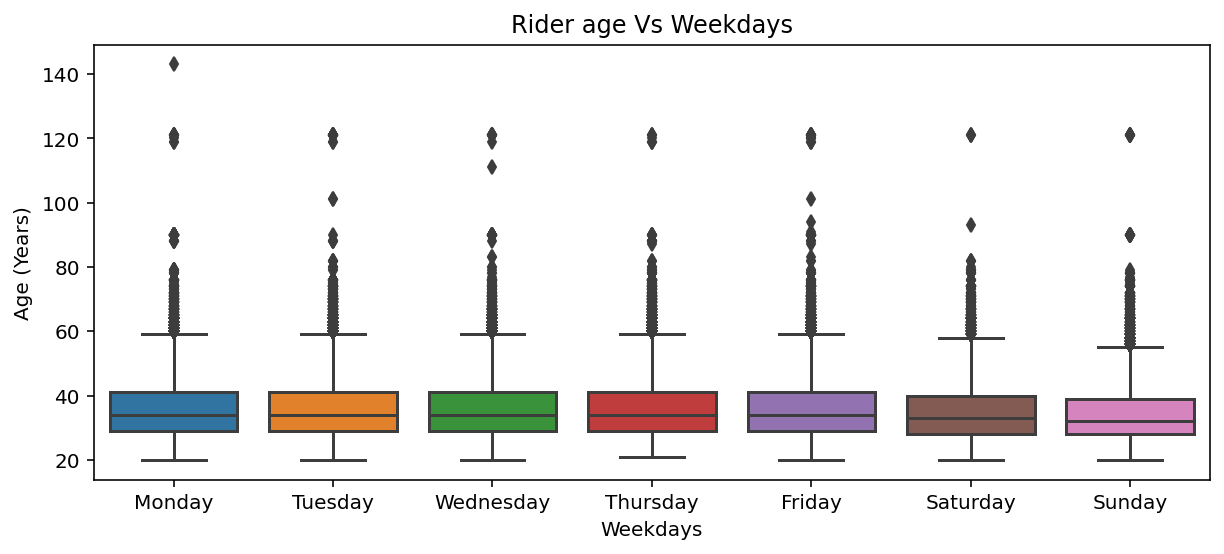

In [48]:
#figure to show the age of bike rider per weekdays
plt.figure(figsize=[10,4])
sns.boxplot(data = df_cleaned, x = 'start_day_of_week', y = 'rider_age')
plt.xlabel('Weekdays')
plt.ylabel('Age (Years)')
plt.title('Rider age Vs Weekdays')

Text(0.5, 1.0, 'Rider age Vs Weekdays')

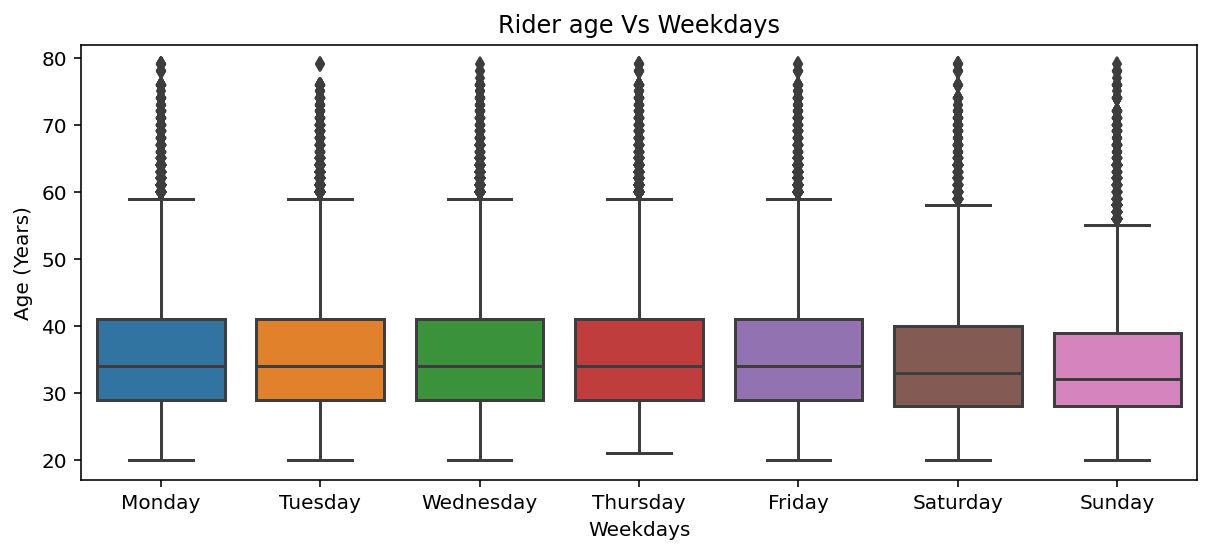

In [49]:
df_cleaned = df_cleaned[df_cleaned['rider_age'] < 80]
plt.figure(figsize=[10,4])
sns.boxplot(data = df_cleaned, x = 'start_day_of_week', y = 'rider_age')
plt.xlabel('Weekdays')
plt.ylabel('Age (Years)')
plt.title('Rider age Vs Weekdays')

As per the figures & also it had shown in the scatter plot above there are many outliers in the rider age. so, i'll consider only the riders who are under the age of 80.

## Multivariate Exploration


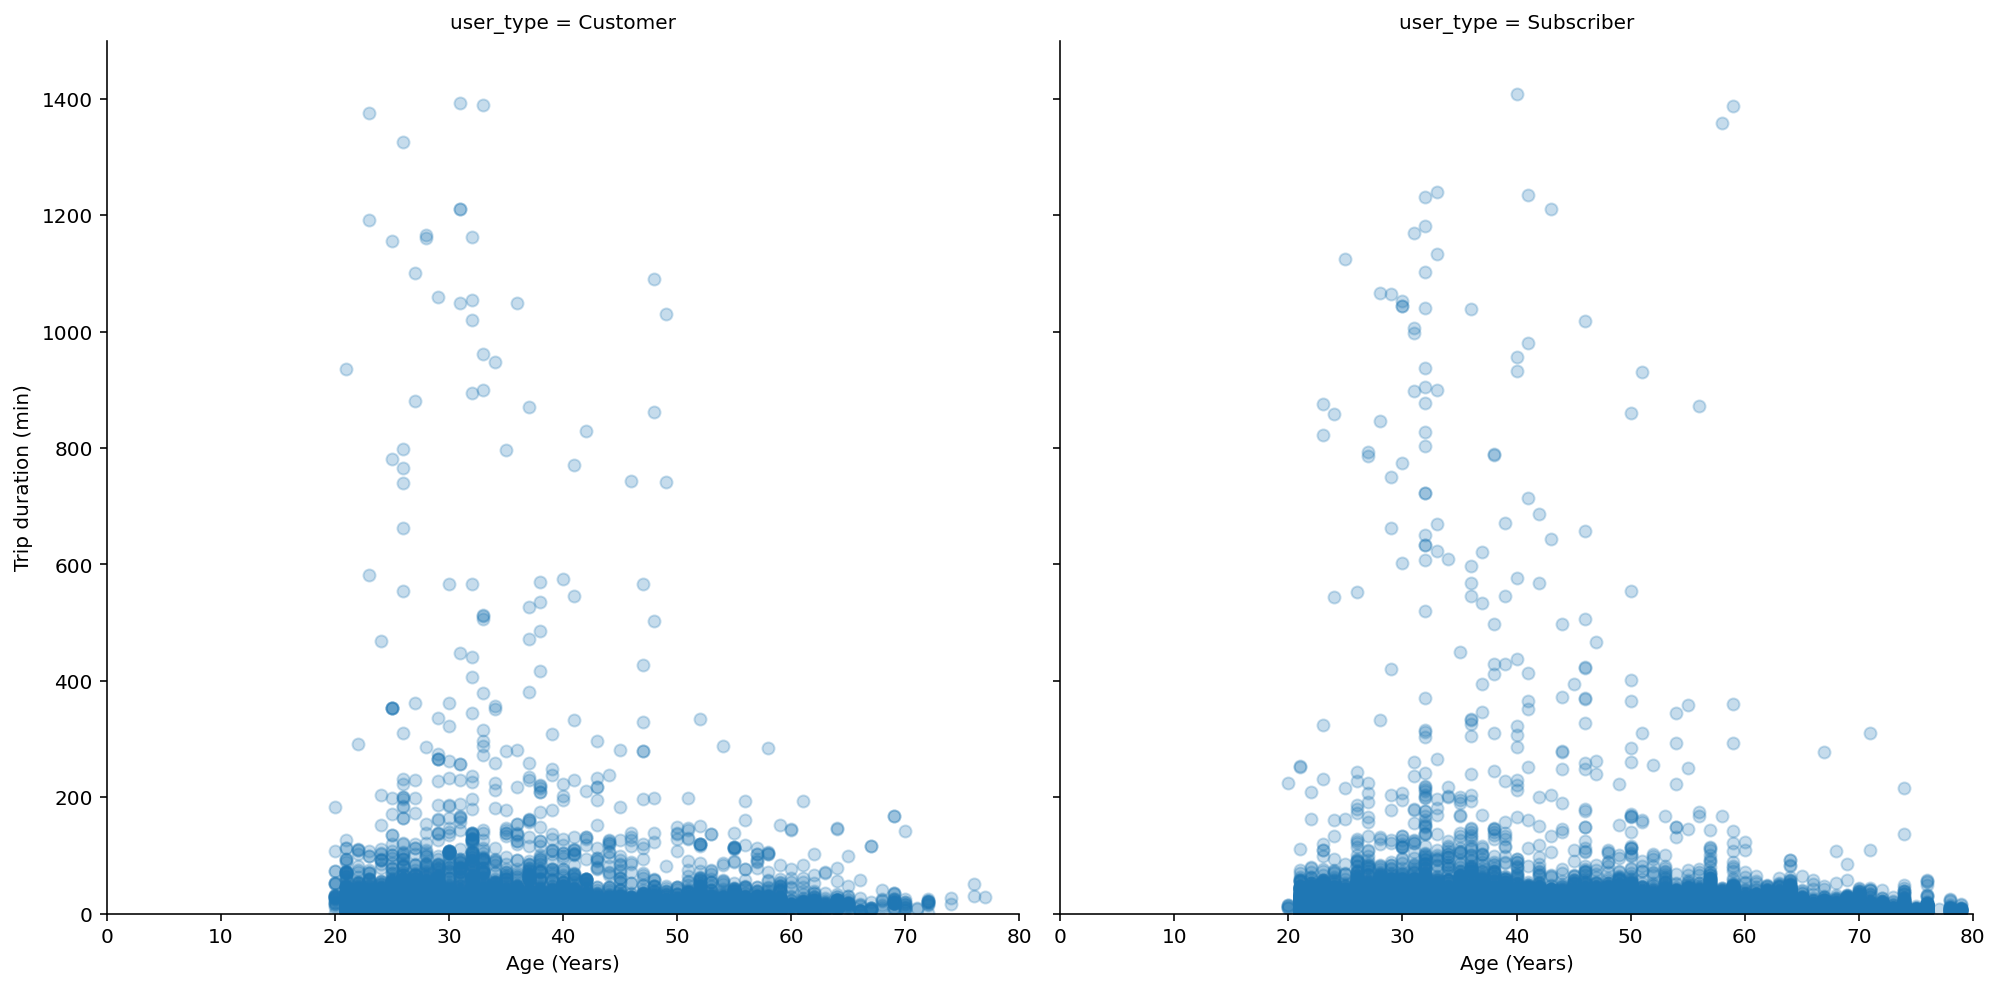

In [53]:
#figure to show the comparison between trip duration, age of bike rider & user type
user_types = sns.FacetGrid(data = df_cleaned, col = 'user_type', col_wrap = 2, height = 7,
                 xlim = [0, 80], ylim = [0, 1500])
user_types.map(plt.scatter, 'rider_age', 'duration_min', alpha=0.25)
user_types.set_xlabels('Age (Years)')
user_types.set_ylabels('Trip duration (min)')

As per the above figure, we can find that the highest duration trip is for a subscriber and the age between 20 to 40 years old. 




Text(0.5, 1.0, 'Rider age according to Gender & Day timing')

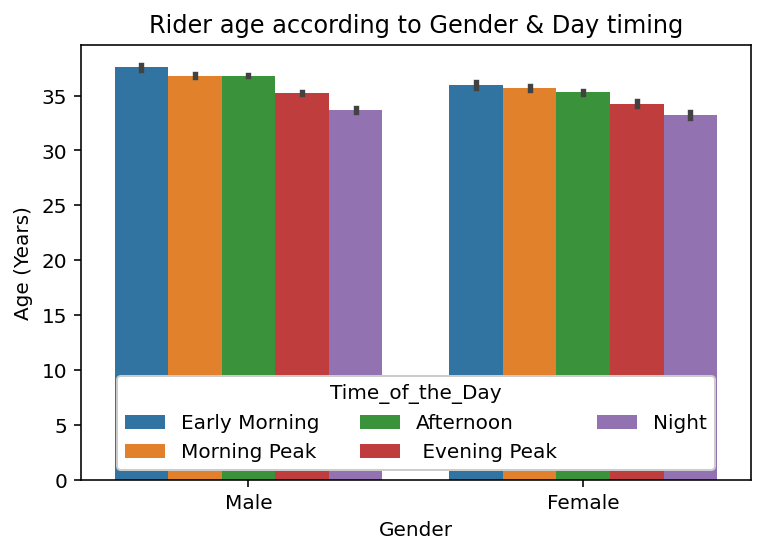

In [54]:
#figure to show the correlation between time of day, gender and age of the rider

ax = sns.barplot(data = df_cleaned, x = 'member_gender', y = 'rider_age', hue = 'time_of_day')
ax.legend(loc =8, ncol = 3, framealpha = 1, title = 'Time_of_the_Day')
plt.xlabel('Gender')
plt.ylabel('Age (Years)')
plt.title('Rider age according to Gender & Day timing')

As we can see the age of the riders for both gender are between 20 to 40 years old and the numbers of males who renting a bike is higher than the number of females during the day time.

## Summery of the observations

The most riders are males subscribers renting the bikes on weekdays more than the weekends and during the morning or evening peak hours.

## Insights

1- Population consisted mostly of male riders(75%) than female riders(23%).                                                                           
2- We observed that there are more subscribers in the dataset than customers.                                
3- We can clearly see that the morning peak (7 am to 10 am) and evening peak (4 pm to 7 pm) are the crowded hours of day for renting a bike in the data provided.                                                                                                
4- We also observed that weekdays are more crowded than the weekends, therefore we assumed that the most bikes are rented by people for mobility to and from work.                                        